# **Bounding Boxes**
* The content is followed using "Bounding Box Formats | Essentials of Object Detection".<br>Reference: https://www.youtube.com/watch?v=w5MrHdiTk9M&list=PLivJwLo9VCUJXdO8SiOjZTWr_fXrAy4OQ&index=2
* Extended by **Vigyannveshi** 
* Through this we shall explore three different bounding box formats:
    1) **PASCAL VOC** [Pattern Analysis, Statistical Modelling and Computational Learning - Visual Object Classes]<br> 
        &nbsp;&nbsp;&nbsp;format: (x_min,y_min,x_max,y_max)
    2) **COCO** [Common Objects in COntext]<br> 
        &nbsp;&nbsp;&nbsp;format: (x_min,y_min,width,height)
    3) **CxCyWH**<br> 
        &nbsp;&nbsp;&nbsp;format: (cx,cy,width,height)
    4) **YOLO** [You Only look Once]<br> 
        * &nbsp;&nbsp;&nbsp;format: (cx,cy,width,height)
        * Here center coordinates and width & height of bounding boxes are normalised wrt image width & height

In [25]:
# imports
from __future__ import annotations
from typing import NamedTuple

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# basic deep learning libraries
import numpy as np
import torch as tr
import torchvision as tv

In [2]:
class BoundingBox(NamedTuple):
    x_min: float
    y_min: float
    x_max: float
    y_max: float

In [18]:
# creating display utils: helps to display image and bounding boxes on the various objects

def bbox_to_matplotlib_rect(bbox: BoundingBox,color:str,linewidth:int=3):
    '''Convert bounding box to matplotlib format'''
    return plt.Rectangle(
        xy=(bbox.x_min,bbox.y_min),
        width=bbox.x_max-bbox.x_min,
        height=bbox.y_max-bbox.y_min,
        fill=False,
        edgecolor=color,
        linewidth=linewidth
    )

def add_box_to_figure(figure, bbox: BoundingBox,color:str):
    p=figure.axes.add_patch(bbox_to_matplotlib_rect(bbox,color))
    return p

def make_image_figure_with_bboxes(image: np.ndarray,bounding_boxes: list[BoundingBox]):
    plt.figure(figsize=(10,6))
    figure=plt.imshow(image)
    colors=["blue"]*len(bounding_boxes)

    # add these anchor boxes we have
    for idx,c in enumerate(colors):
        patch=add_box_to_figure(figure,bounding_boxes[idx],c)

    plt.xlim((0,image.shape[1]))
    plt.ylim((image.shape[0],0))
    plt.show()


**PASCAL VOC format: (x_min,y_min,x_max,y_max)**

In [8]:
# getting image and ground truth boxes
img=plt.imread('../datasets/images/giraffe.jpg')

# will display only 1 box for now
gt_boxes = [
    BoundingBox(x_min=385, y_min=60, x_max=600, y_max=357),     
]

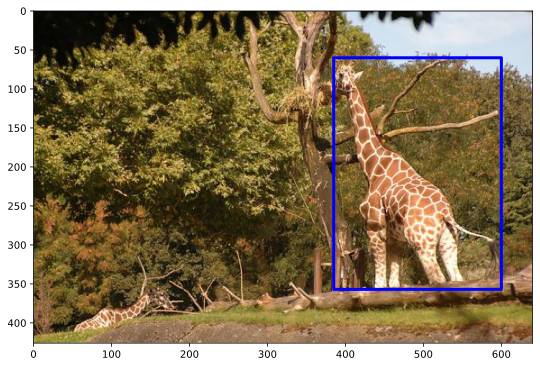

In [19]:
make_image_figure_with_bboxes(img,gt_boxes)

**COCO format: (x_min,y_min,width,height)**

In [21]:
class CocoBoundingBox(NamedTuple):
    x_min: float
    y_min: float
    width: float
    height: float

In [22]:
gt_coco_boxes = [
    CocoBoundingBox(x_min=385, y_min=60, width=215, height=297),     
]

In [35]:
# converting from COCO to PASCAL VOC format
tv.ops.box_convert(tr.Tensor(gt_coco_boxes),in_fmt="xywh",out_fmt="xyxy").squeeze()

tensor([385.,  60., 600., 357.])

**CxCyWH format: (cx,cy,width,height)**

In [37]:
class CxCyWHBoundingBox(NamedTuple):
    cx: float
    cy: float
    width: float
    height: float

In [38]:
gt_cxcy_boxes = [
    CxCyWHBoundingBox(cx=492.5, cy=208.5, width=215, height=297),     
]

In [39]:
# convert from cxcywh to xyxy format
tv.ops.box_convert(tr.Tensor(gt_cxcy_boxes), in_fmt="cxcywh", out_fmt="xyxy")

tensor([[385.,  60., 600., 357.]])

**YOLO format: (cx,cy,width,height)**

In [36]:
image_height, image_width, _ = img.shape
image_height, image_width

(426, 640)

In [41]:
def normalize_cxcywh_box(box: CxCyWHBoundingBox,
                         image_width:int, 
                         image_height:int) -> tuple[float, float, float, float]:  
  cx = box.cx / image_width
  cy = box.cy / image_height
  width = box.width / image_width
  height = box.height / image_height
  return (cx, cy, width, height)

In [42]:
normalize_cxcywh_box(gt_cxcy_boxes[0], image_width, image_height)

(0.76953125, 0.4894366197183099, 0.3359375, 0.6971830985915493)